# Link to the raw dataset and its description file
https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
label=['CLASS','AGE','SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA',
       'LIVER_BIG','LIVER_FIRM','SPLEEN_PALPABLE','SPIDERS','ASCITES','VARICES','BILIRUBIN','ALK_PHOSPHATE','SGOT','ALBUMIN',
      'PROTIME','HISTOLOGY'] # Labels are from hepatitis.names file present in the link provided above

In [3]:
df=pd.read_csv('hepatitis.data.txt', sep=',' ,header=None, names=label)

In [4]:
df.head() # can also use df.info to see column information but df.head() gives the gist of what the columns have

,CLASS,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [5]:
df.replace('?','NaN', inplace=True) # Replace ? as seen above to NaN

In [6]:
## Fill NaN values with mean of the column as our dataset is small and don't want to waste observations
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
imputer = imputer.fit(df.iloc[:, :])
df.iloc[:, :] = imputer.transform(df.iloc[:, :])

C:\Users\Bhavani\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
df=df.astype('float') # Cannot convert string representation of float values to int. So, first converted to float
df=df.astype('int')

The dataset is highly imbalanced:
 2    123
1     32
Name: CLASS, dtype: int64


Visualization


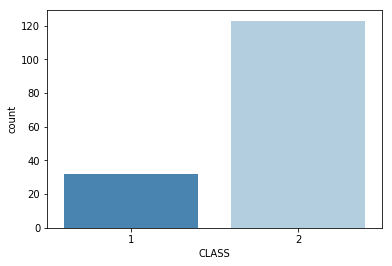

In [8]:
# Look at the distribution of dead or alive patients (i.e., in this case target variable)
print("The dataset is highly imbalanced:\n", df.CLASS.value_counts())
print("\n\nVisualization")
ax = sns.countplot(x='CLASS', data=df, palette = "Blues_r")

#### This shows the target variable is unbalanced

In [9]:
df.CLASS.replace([1, 2], ['DEAD','ALIVE'], inplace=True)
df.SEX.replace([1,2],['MALE','FEMALE'], inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
CLASS              155 non-null object
AGE                155 non-null int32
SEX                155 non-null object
STEROID            155 non-null int32
ANTIVIRALS         155 non-null int32
FATIGUE            155 non-null int32
MALAISE            155 non-null int32
ANOREXIA           155 non-null int32
LIVER_BIG          155 non-null int32
LIVER_FIRM         155 non-null int32
SPLEEN_PALPABLE    155 non-null int32
SPIDERS            155 non-null int32
ASCITES            155 non-null int32
VARICES            155 non-null int32
BILIRUBIN          155 non-null int32
ALK_PHOSPHATE      155 non-null int32
SGOT               155 non-null int32
ALBUMIN            155 non-null int32
PROTIME            155 non-null int32
HISTOLOGY          155 non-null int32
dtypes: int32(18), object(2)
memory usage: 13.4+ KB


# Exploratory data analysis 

In [10]:
# find the continous variables i.e, in this case columns with unique values more than two to build distribution function 
cont_var=[] #list of continous variables
for i in range(len(df.columns)):
    if len(set(df.iloc[:,i]))>2:
        cont_var.append(df.columns[i])

In [11]:
df1=df.drop(['CLASS','SEX'], axis=1)

# Univariate analysis

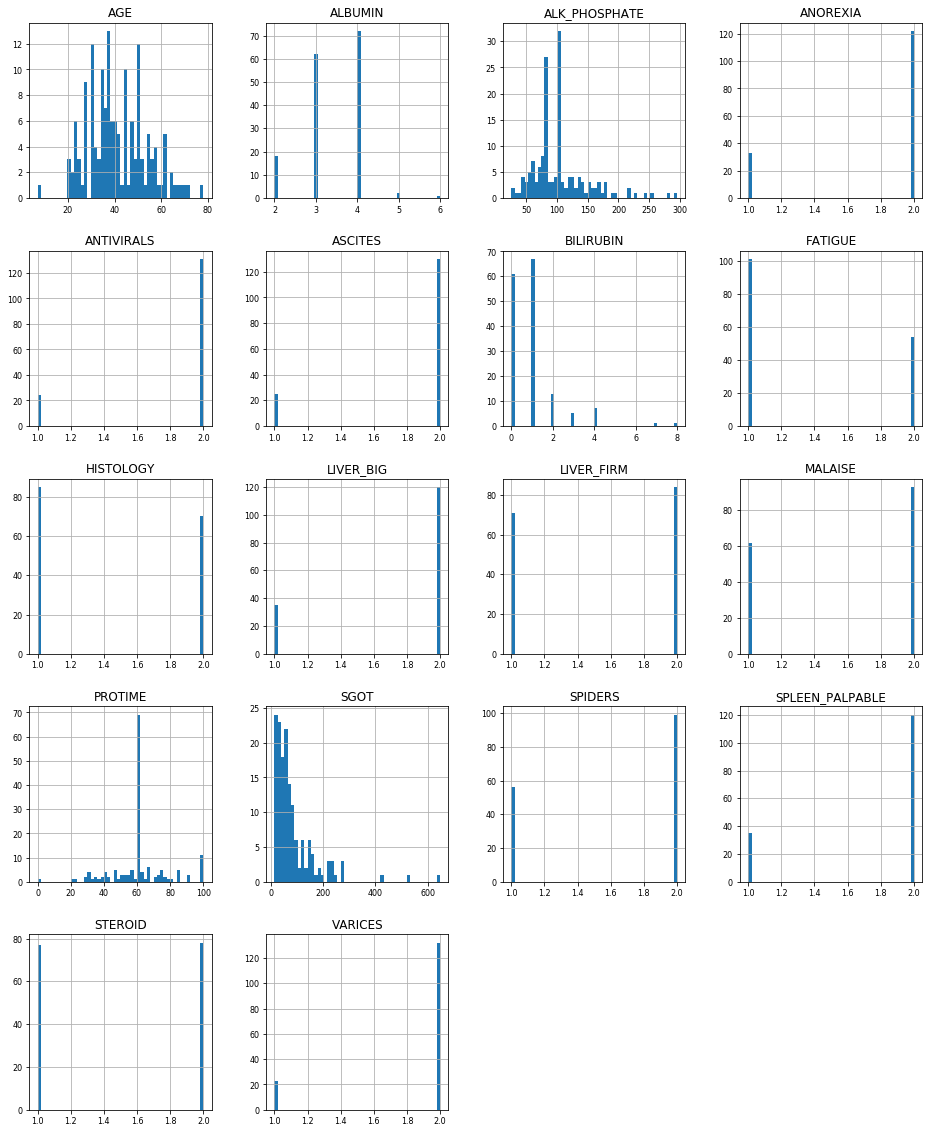

In [12]:
df1.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8, grid=True)
plt.show()

#### The distribution between Varices and Ascites is similar which makes sense because Varices can be estimated based on Ascites in diagnosis (relation).


# Bivariate analysis

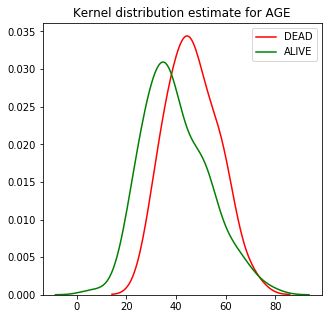

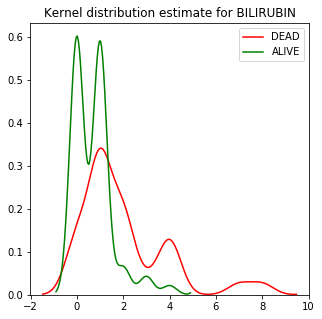

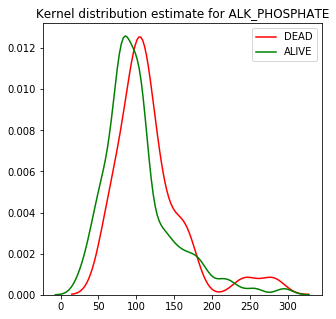

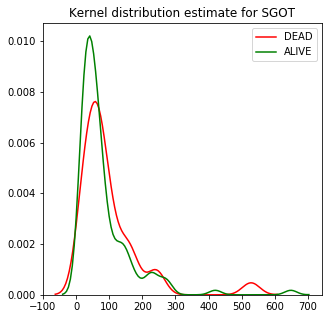

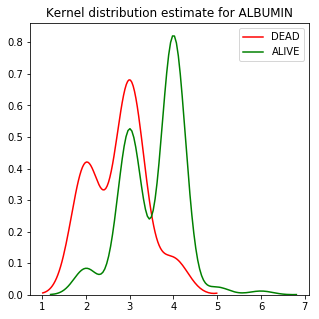

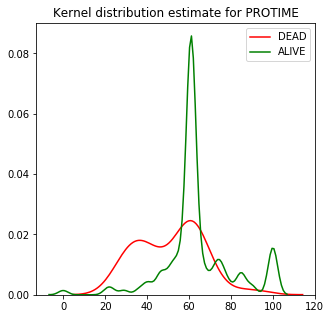

In [13]:
def pdfplot(variable):
    plt.figure(figsize=(5, 5))
    plt.title("Kernel distribution estimate for {}".format(variable))
    cur_dead = sns.kdeplot(df[df['CLASS'] == 'DEAD'][variable], color= 'red', label= 'DEAD')
    cur_alive = sns.kdeplot(df[df['CLASS'] == 'ALIVE'][variable], color= 'green', label= 'ALIVE')
    
for i in range(len(cont_var)):
    pdfplot(cont_var[i])

### Interpretation:
#### Age doesn't seem to be much of a promising factor currently, but can be verified further
#### Lower bilirubin level shows more live hepatitis patients
#### Alkaline Phosphatase and SGOT distributions aren't much different in dead and alive hepatitis patients but alive hepatitis patients tend to have levels at lower side
#### Lower albumin levels are present in severe/dead hepatitis patients
#### Prothrombin time seem to follow normal distribution for alive hepatitis patients. These interpretation will be further evaluated further by creating random forest model feature importance.


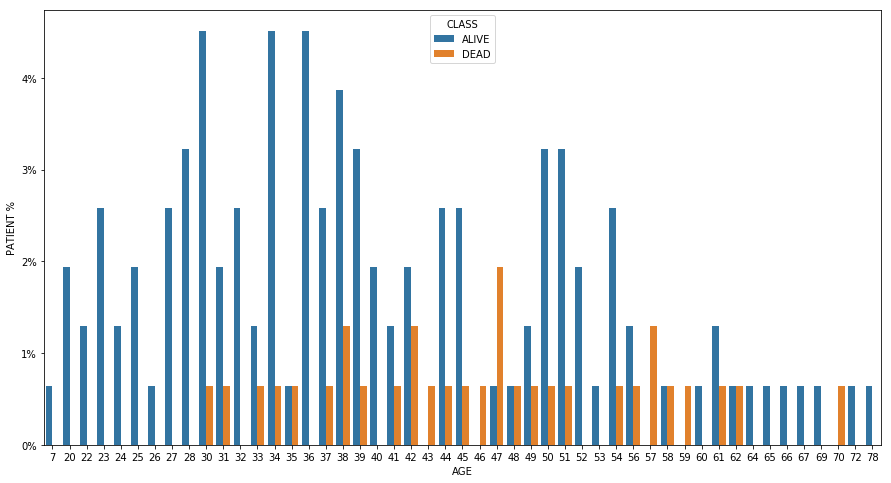

In [14]:
def barplot_percentages(feature, orient='v', axis_name="PATIENT %"):
    plt.figure(figsize=(15, 8))
    ratios = pd.DataFrame()
    g = df.groupby(feature)["CLASS"].value_counts().to_frame()
    g = g.rename({"CLASS": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='CLASS', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='CLASS', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()], rotation=60)
    ax.plot()
barplot_percentages("AGE")

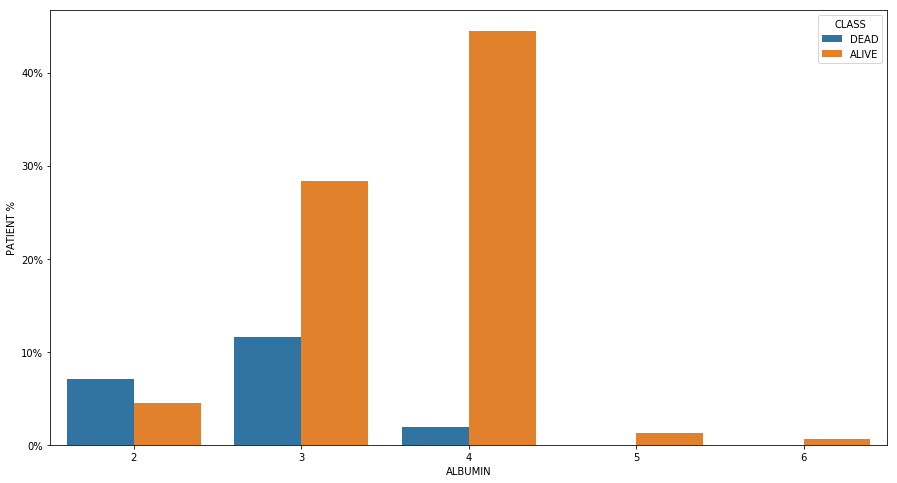

In [15]:
barplot_percentages("ALBUMIN", orient="v")



#### Number of deaths are more in hepatitis patients with less than normal albumin which justifies the diagnosis that hepatitis patients might have less albumin than normal

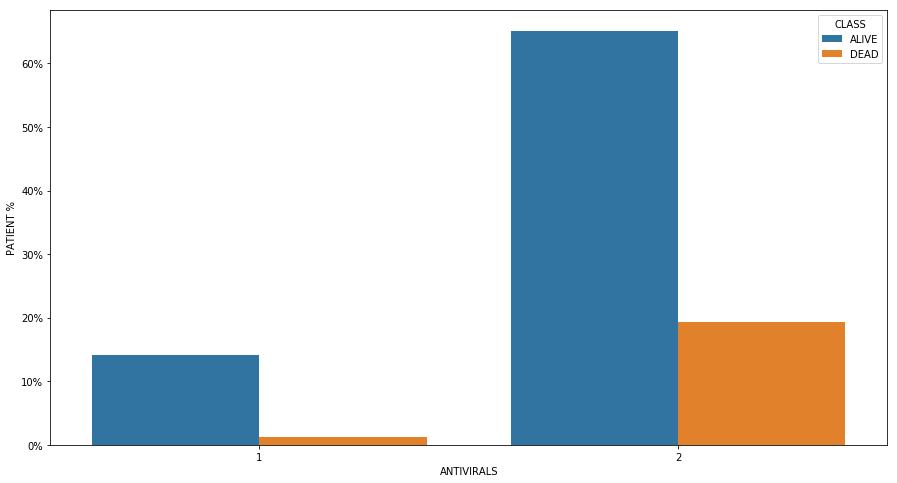

In [16]:
barplot_percentages("ANTIVIRALS", orient="v")

#### Individuals taking the antivirals have more survival rate which justifies the fact that hepatitis b or c patients are prescribed antivirals for treatment.


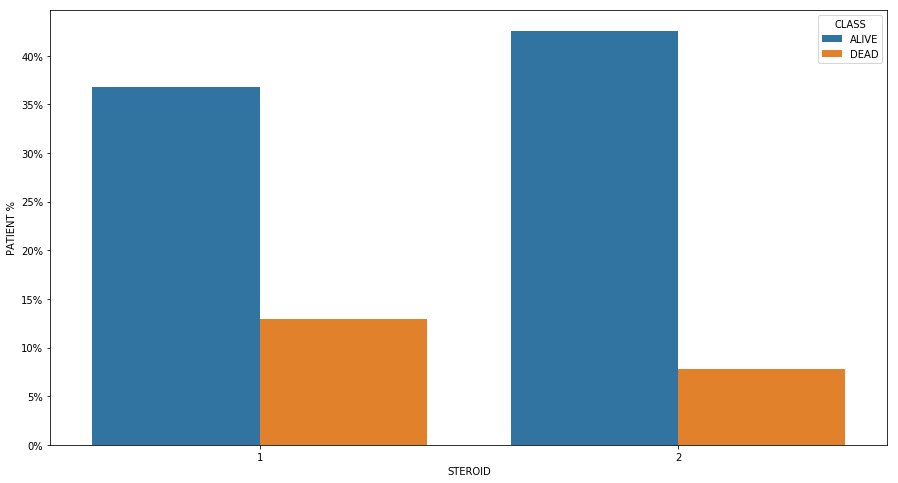

In [17]:
barplot_percentages("STEROID", orient="v")

#### Use of steroids doesn't seem to have severe impact on hepatitis patients

# Multivariate analysis

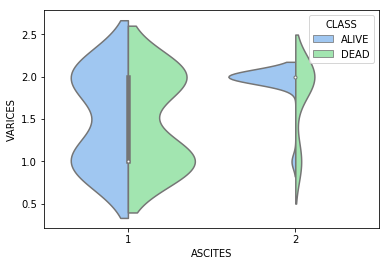

In [18]:
ax = sns.violinplot(x="ASCITES", y="VARICES", hue="CLASS", kind="violin",
                 split=True, palette="pastel", data=df, height=4.2, aspect=1.4)# STEROID NO=1,YES=2


#### Violoin plot shows

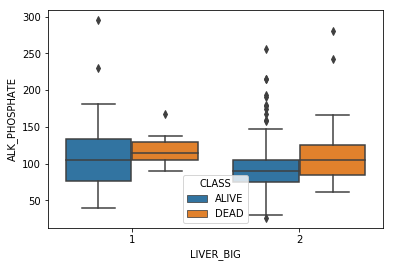

In [19]:
sns.boxplot(x='LIVER_BIG',y='ALK_PHOSPHATE', hue='CLASS', data=df)


#### Advantage of the boxplot is that we can find the outliers, median, inter-quartile ranges too.
#### Interpretation: Seems that the increase in liver size with increase of alkaline phophatase have more deaths. Though the medians are close, we can consider as  our sample size is too low.

## Correlation map/heat map to show the correlated variables in the dataset using pearson method internally

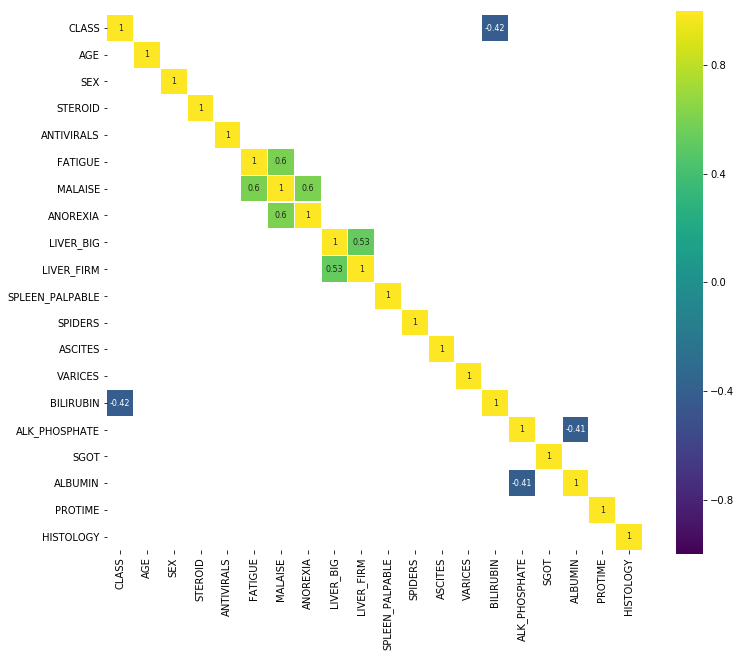

In [20]:
df.CLASS.replace(['DEAD','ALIVE'],[0, 1], inplace=True)
df.SEX.replace(['MALE','FEMALE'],[0,1], inplace=True)
corr = df.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

#### Interpretation: 
#### The values more close to one indicate strong correlation
#### The values with negative sign indicates negative correlation
#### Values with positive sign indicates positive correlation

# Finding the feature importance through random forest model 

In [21]:
df.STEROID.replace([1,2],[0,1], inplace=True)
df.ANTIVIRALS.replace([1,2],[0,1], inplace=True)
df.FATIGUE.replace([1,2],[0,1], inplace=True)
df.ANOREXIA.replace([1,2],[0,1], inplace=True)
df.MALAISE.replace([1,2],[0,1], inplace=True)
df.LIVER_BIG.replace([1,2],[0,1], inplace=True)
df.LIVER_FIRM.replace([1,2],[0,1], inplace=True)
df.SPLEEN_PALPABLE.replace([1,2],[0,1], inplace=True)
df.SPIDERS.replace([1,2],[0,1], inplace=True)
df.ASCITES.replace([1,2],[0,1], inplace=True)
df.VARICES.replace([1,2],[0,1], inplace=True)
df.HISTOLOGY.replace([1,2],[0,1], inplace=True)

In [22]:
dum_label=['CLASS','SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA',
       'LIVER_BIG','LIVER_FIRM','SPLEEN_PALPABLE','SPIDERS','ASCITES','VARICES','HISTOLOGY']
df= pd.get_dummies(df, columns=dum_label)

In [23]:
x=df.drop(['CLASS_0','CLASS_1'],axis=1)
y=df['CLASS_0']

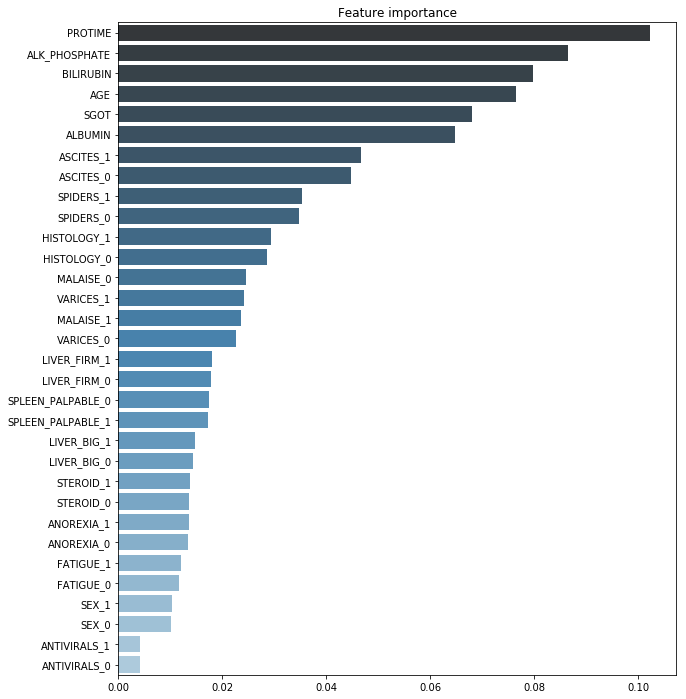

In [25]:
from sklearn.ensemble import RandomForestClassifier
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}

# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')


In [30]:
print("Interpretation:\nResults show that Protime feature is important in hepatitis severity prediction followed by Alkaline \
phosphatase")

Interpretation:
Results show that Protime feature is important in hepatitis severity prediction followed by Alkaline phosphatase
